In [1]:
import pylab as pl
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import pdist,squareform
 
# box size
L=50.
threshold=0.3
# create data
X=pl.uniform(-1,1, size=(500,2))
X[0:100] += 20 
X[0:100] %= L

# create for corners
X[:,0]-=1
X[X<0]+=L
 

X.shape

(500, 2)

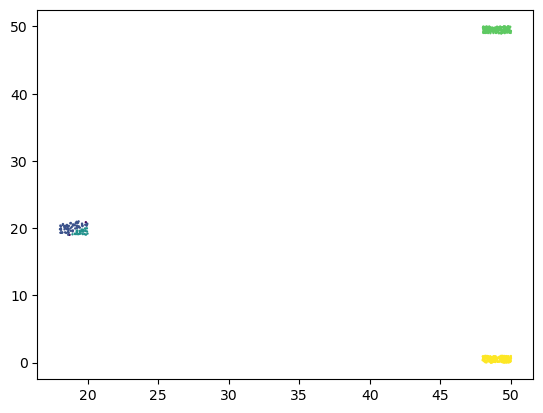

<Figure size 640x480 with 0 Axes>

In [2]:


# finding clusters, no periodic boundaries
db=DBSCAN(eps=threshold).fit(X)
 
pl.scatter(X[:,0], X[:,1],c=db.labels_, s=3,edgecolors='None')
pl.figure()
pl.show()


In [10]:

 
# 1) find the correct distance matrix
m = pl.zeros(X.shape[1])
total = 0
for d in range(X.shape[1]):
    # find all 1-d distances
    pd=pdist(X[:,d].reshape(X.shape[0],1))
    # apply boundary conditions
    pd[pd>L*0.5]-=L
    m[d] = max(pd**2)
    try:
        # sum
        total+=pd**2
    except Exception as e:
        # or define the sum if not previously defined
        total=pd**2
    print(d, max(total))
# transform the condensed distance matrix...
total=pl.sqrt(total) 
print(max(total))
# ...into a square distance matrix
square=squareform(total)

print(max(square.flatten()))
m

0 513.2126479101465
1 982.8249570824578
31.350039187893493
31.350039187893493


array([483.5254013 , 483.79364724])

In [4]:
def periodic_distance_matrix_1D(X, d, L):
    pd=pdist(X[:,d].reshape(X.shape[0],1))
    pd[pd>L*0.5]-=L
    return pd**2
def periodic_distance_matrix(X, periods):
    total = 0
    for d, L in zip(range(X.shape[1]), periods):
        pd2 = periodic_distance_matrix_1D(X, d, L)
        mp[d] = max(pd2)
        total+=pd2
        print(d, max(total))

    return pl.sqrt(total)

mp = pl.zeros(X.shape[1])

total = periodic_distance_matrix(X, [L, L])
print(max(total))
square = squareform(total)
print(max(square.flatten()))
mp

0 483.5254013009665
1 951.4749179266623
30.845987063581905
30.845987063581905


array([483.5254013 , 483.79364724])

2


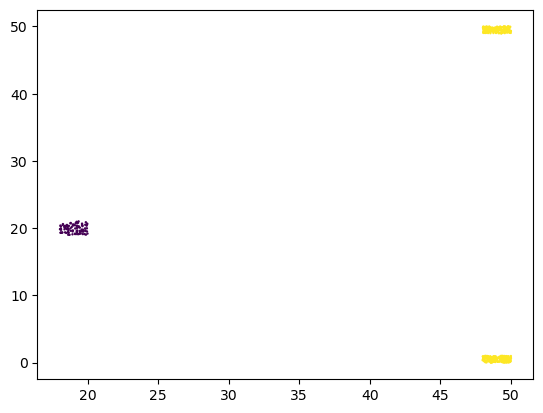

In [5]:

db=DBSCAN(eps=2, metric='precomputed').fit(square)
print(len(set(db.labels_)))
pl.scatter(X[:,0], X[:,1],c=db.labels_,s=3, edgecolors='None')
pl.show()